Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

Come up with some initial hypotheses based on your goal of predicting property value.

Visualize all combinations of variables in some way.

Run the appropriate statistical tests where needed.

What independent variables are correlated with the dependent variable, home value?

Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

Explore your dataset with any other visualizations you think will be helpful.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

import prepare_telco
import wrangle
import os
from env import user, password, host

import warnings
warnings.filterwarnings("ignore")
from scipy import stats

from scipy.stats import pearsonr, spearmanr

In [4]:
# Acquire and Prepare Data
# We will use the function we created and stored in our 
# wrangle file to quickly acquire and prepare

In [5]:
df=wrangle.wrangle_zillow()

In [6]:
train, validate, test = prepare_telco.split(df, stratify_by=None)

In [7]:
train.head()

,bedrooms,bathrooms,sqft,home_value,yearbuilt,taxamount,fips,cost_per_sqft,sqft_room_ratio,6037.0,6059.0,6111.0
1088045,3,2.0,1068,47535,1959,567.16,6111.0,44.51,213.60,0,0,1
1457900,3,2.0,1542,847768,1941,9306.24,6037.0,549.78,308.40,1,0,0
115397,3,2.5,2174,306182,1964,3762.70,6059.0,140.84,395.27,0,1,0
506301,3,2.0,1359,156270,1973,1675.46,6111.0,114.99,271.80,0,0,1
641634,3,2.0,1200,79986,1977,1292.17,6037.0,66.66,240.00,1,0,0


In [8]:
train.columns.tolist()

['bedrooms',
 'bathrooms',
 'sqft',
 'home_value',
 'yearbuilt',
 'taxamount',
 'fips',
 'cost_per_sqft',
 'sqft_room_ratio',
 '6037.0',
 '6059.0',
 '6111.0']

In [10]:
#Check the shape of train
train.shape

(1153611, 12)

In [11]:
#Define the visualization function
def plot_variable_pairs(df):
    sns.pairplot(data=df.sample(1000), kind='reg', diag_kind='kde')

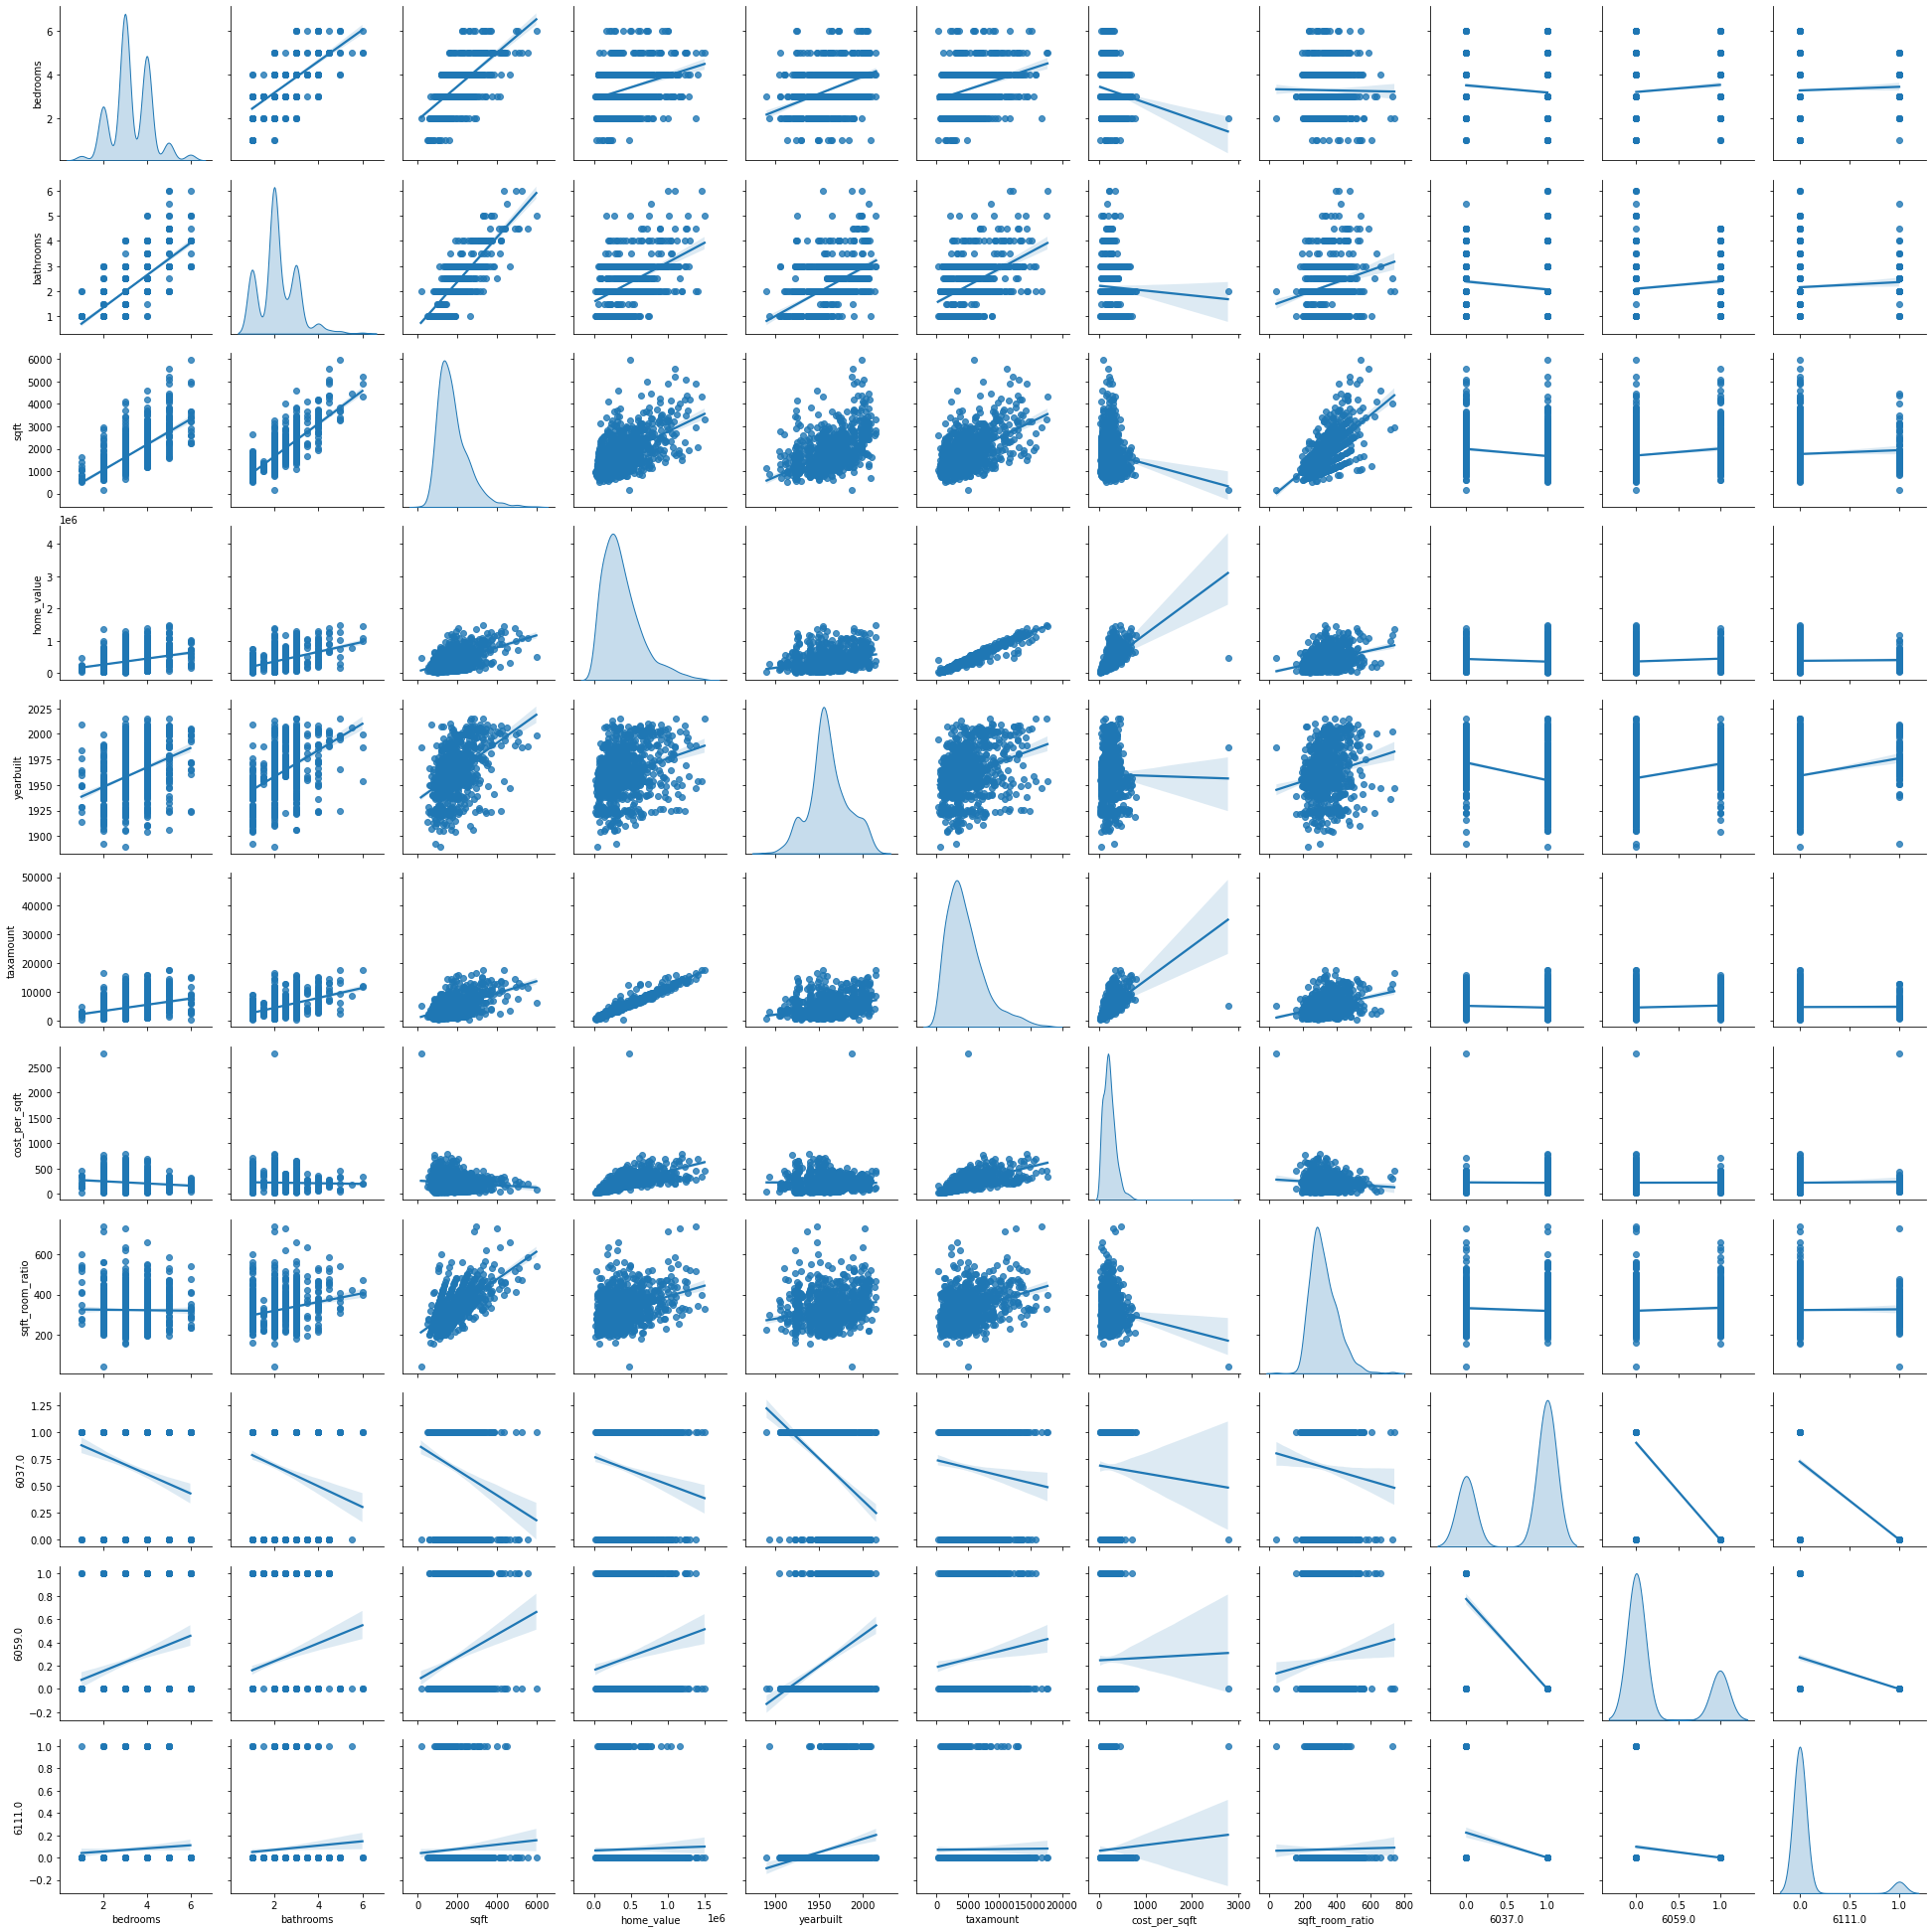

In [12]:
plot_variable_pairs(train)

In [ ]:
# #Exercise 4
# Write a function named plot_categorical_and_continuous_vars that 
# accepts your dataframe and the name of the columns that hold the continuous 
# and categorical features and outputs 3 different plots for visualizing a categorical 
# variable and a continuous variable.

In [13]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    df_sample = df.sample(1000)
    plt.figure()
    sns.stripplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.boxplot(x=categorical, y=continuous, data=df_sample)
    plt.figure()
    sns.barplot(x=categorical, y=continuous, data=df_sample)

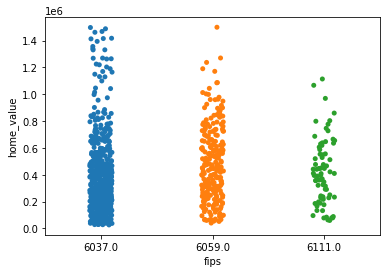

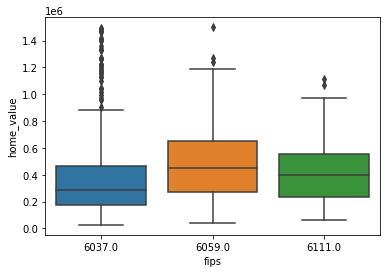

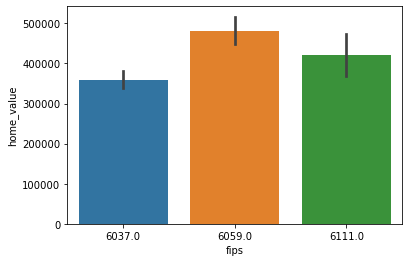

In [15]:
plot_categorical_and_continuous_vars(train, 'fips', 'home_value')

In [ ]:
# Exercise 5
# Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

In [ ]:
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import os
# from sklearn.preprocessing import MinMaxScaler
# import sklearn.preprocessing
# from env import user, password, host

# def get_db_url(database):
#     return f'mysql+pymysql://{user}:{password}@{host}/{database}'

# """
# USAGE: 
# Use `from wrangle import wrangle_zillow` at the top of your notebook.
# This 
# """
# def get_zillow_data():
#     """Seeks to read the cached zillow.csv first """
#     filename = "zillow.csv"

#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         return get_new_zillow_data()

# def get_new_zillow_data():
#     """Returns a dataframe of all 2017 properties that are Single Family Residential"""

#     sql = """
#     select 
#     bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips
#     from properties_2017
#     join propertylandusetype using (propertylandusetypeid)
#     where propertylandusedesc = "Single Family Residential"
#     """
#     return pd.read_sql(sql, get_db_url("zillow"))


# def handle_nulls(df):    
#     # We keep 99.41% of the data after dropping nulls
#     # round(df.dropna().shape[0] / df.shape[0], 4) returned .9941
#     df = df.dropna()
#     return df


# def optimize_types(df):
#     # Convert some columns to integers
#     # fips, yearbuilt, and bedrooms can be integers
#     df["fips"] = df["fips"].astype(str)
#     df["yearbuilt"] = df["yearbuilt"].astype(int)
#     df["bedroomcnt"] = df["bedroomcnt"].astype(int)    
#     df["taxvaluedollarcnt"] = df["taxvaluedollarcnt"].astype(int)
#     df["calculatedfinishedsquarefeet"] = df["calculatedfinishedsquarefeet"].astype(int)
#     return df


# def handle_outliers(df):
#     """Manually handle outliers that do not represent properties likely for 99% of buyers and zillow visitors"""
#     df = df[df.bathroomcnt <= 6]
    
#     df = df[df.bedroomcnt <= 6]

#     df = df[df.taxvaluedollarcnt < 1_500_000]

#     df.drop(df.loc[df.calculatedfinishedsquarefeet >15000].index, inplace=True)

#     df.drop(df.loc[df['bedroomcnt']==0].index, inplace=True)
    
#     df.drop(df.loc[df['bathroomcnt']==0].index, inplace=True)

#     return df


# def wrangle_zillow():
#     """
#     Acquires Zillow data
#     Handles nulls
#     optimizes or fixes data types
#     handles outliers w/ manual logic
#     returns a clean dataframe
#     """
#     df = get_zillow_data()

#     df = handle_nulls(df)

#     df = optimize_types(df)

#     df = handle_outliers(df)

#     #new column total bill divided by size
#     df['cost_per_sqft'] = (df['taxvaluedollarcnt']/df['calculatedfinishedsquarefeet']).round(2)

#     #avg sqft per number of rooms (bedroom+bathroom)
#     df['sqft_room_ratio'] = (df['calculatedfinishedsquarefeet']/(df['bedroomcnt']+df['bathroomcnt'])).round(2)

#     #dummy encode fips
#     dummies = pd.get_dummies(df.fips)
#     df = pd.concat([df,dummies],axis=1)

#    # df.to_csv("zillow.csv", index=False)
#    #rename columns for ease of use
#     df=df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "sqft","taxvaluedollarcnt": "home_value"})

#     return df

# def split(df, stratify_by=None):
#     """
#     Crude train, validate, test split
#     To stratify, send in a column name for the stratify_by argument
#     """

#     if stratify_by == None:
#         train, test = train_test_split(df, test_size=.2, random_state=123)
#         train, validate = train_test_split(train, test_size=.3, random_state=123)
#     else:
#         train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
#         train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train[stratify_by])

#     return train, validate, test

# def scale_zillow(train, validate, test):
#     '''
#     scale_zillow will 
#     - fits a min-max scaler to the train split
#     - transforms all three spits using that scaler. 
#     returns: 3 dataframes with the same column names and scaled values. 
#     '''
    
#     scaler = sklearn.preprocessing.MinMaxScaler()
    
#     # Note that we only call .fit with the TRAINING data,
#     scaler.fit(train)
    
#     # but we use .transform to apply the scaling to all the data splits.    
#     train_scaled = scaler.transform(train)
#     validate_scaled = scaler.transform(validate)
#     test_scaled = scaler.transform(test)
    
#     # convert to arrays to pandas DFs
#     train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
#     validate_scaled = pd.DataFrame(validate_scaled, columns=train.columns)
#     test_scaled = pd.DataFrame(test_scaled, columns=train.columns)
    
#     return train_scaled, validate_scaled, test_scaled

In [ ]:
# Exercise 6
# Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

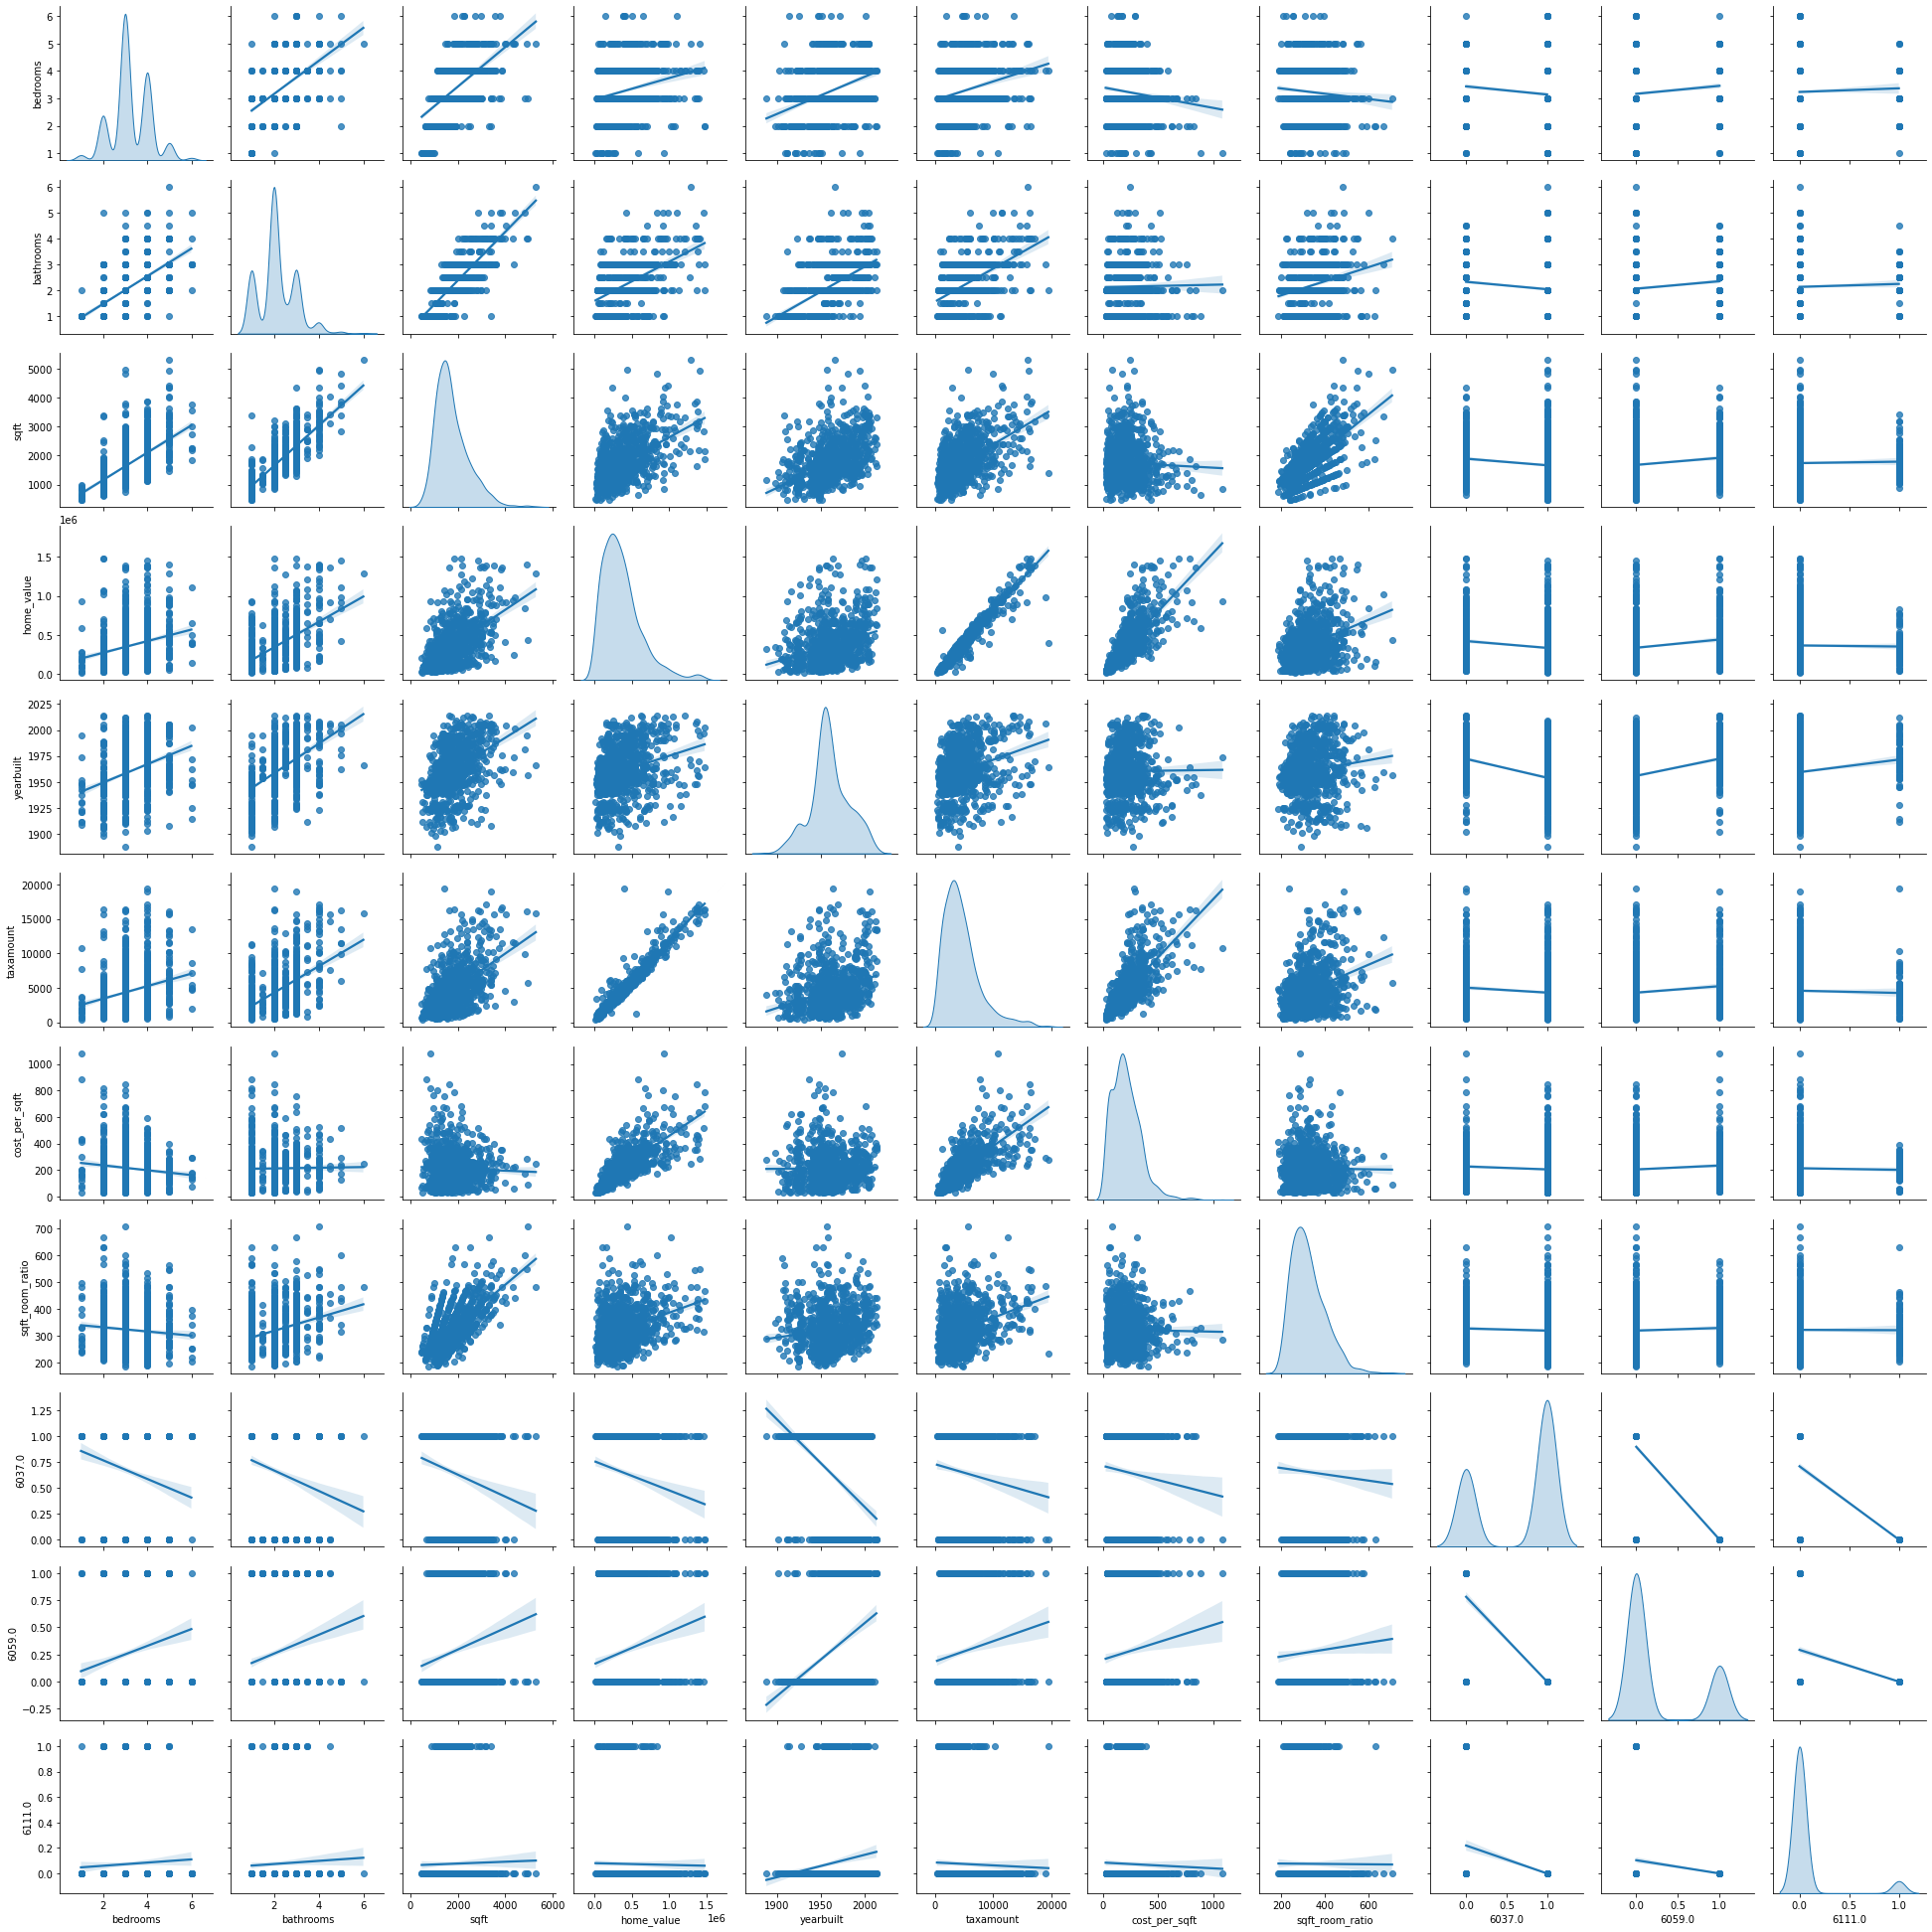

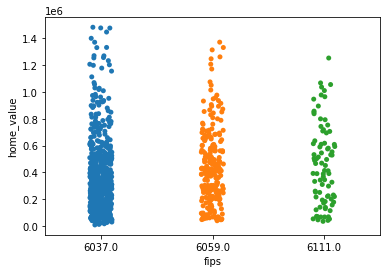

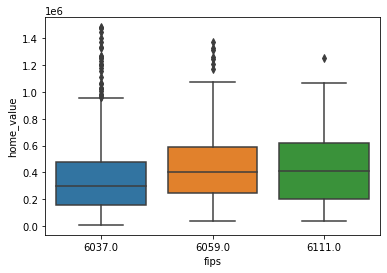

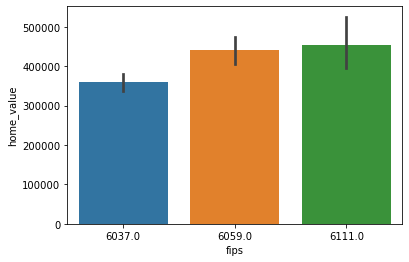

In [17]:
# from explore import plot_variable_pairs, plot_categorical_and_continuous_vars

plot_variable_pairs(train)

plot_categorical_and_continuous_vars(train, 'fips', 'home_value')

In [ ]:
# Exercise 7
# Come up with some initial hypotheses based on your goal of predicting property value


# Initial hypotheses
# Bedroom count is correlated with home value.
# Bathroom count is correlated with home value.
# Square footage is correlated with home value.
# Location is correlated with home value.

In [ ]:
# Exercise 8
# Visualize all combinations of variables in some way.

In [18]:
train_corr = train.corr()
train_corr

,bedrooms,bathrooms,sqft,home_value,yearbuilt,taxamount,cost_per_sqft,sqft_room_ratio,6037.0,6059.0,6111.0
bedrooms,1.000000,0.621901,0.616191,0.267098,0.385566,0.268787,-0.027779,-0.046173,-0.174773,0.130648,0.094885
bathrooms,0.621901,1.000000,0.813393,0.484619,0.537029,0.486242,-0.004922,0.261175,-0.169989,0.142561,0.066939
sqft,0.616191,0.813393,1.000000,0.558553,0.478770,0.555347,-0.015958,0.670977,-0.174762,0.144153,0.072763
home_value,0.267098,0.484619,0.558553,1.000000,0.284909,0.970999,0.147267,0.396587,-0.147818,0.140267,0.031532
yearbuilt,0.385566,0.537029,0.478770,0.284909,1.000000,0.292956,-0.007284,0.165311,-0.370298,0.291788,0.176521
taxamount,0.268787,0.486242,0.555347,0.970999,0.292956,1.000000,0.141416,0.388617,-0.083999,0.090520,0.000225
cost_per_sqft,-0.027779,-0.004922,-0.015958,0.147267,-0.007284,0.141416,1.000000,-0.008432,-0.006683,0.009801,-0.004235
sqft_room_ratio,-0.046173,0.261175,0.670977,0.396587,0.165311,0.388617,-0.008432,1.000000,-0.061507,0.058828,0.012363
6037.0,-0.174773,-0.169989,-0.174762,-0.147818,-0.370298,-0.083999,-0.006683,-0.061507,1.000000,-0.829933,-0.408046
6059.0,0.130648,0.142561,0.144153,0.140267,0.291788,0.090520,0.009801,0.058828,-0.829933,1.000000,-0.170656


<AxesSubplot:>

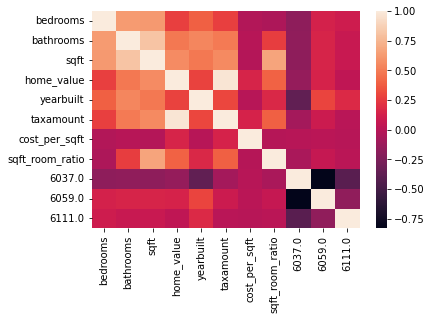

In [19]:

sns.heatmap(train_corr)

In [20]:
# Exercise 9
# Run the appropriate statistical tests where needed.

In [23]:
alpha = 0.05

r_bed, p_bed = stats.pearsonr(x=train['bedrooms'], y=train['home_value'])

r_bath, p_bath = stats.pearsonr(x=train['bathrooms'], y=train['home_value'])

In [ ]:
# Exercise 10
# What independent variables are correlated with the dependent variable, home value?

In [24]:
if p_bed < alpha:
    print('The number of bedrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bed))
else:
    print('The number of bedrooms is NOT correlated with home value.')

print()    
    
if p_bath < alpha:
    print('The number of bathrooms is correlated with home value.')
    print('The correlation coefficient is {}.'.format(r_bath))
else:
    print('The number of bathrooms is NOT correlated with home value.')

The number of bedrooms is correlated with home value.
The correlation coefficient is 0.26709794617249344.

The number of bathrooms is correlated with home value.
The correlation coefficient is 0.4846190958367729.


In [ ]:
# Exercise 11
# Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [27]:

r_ind, p_ind = stats.pearsonr(x=train['sqft'], y=train['bathrooms'])

In [28]:
if p_ind < alpha:
    print('The number of bathrooms is correlated with the square footage.')
    print('The correlation coefficient is {}.'.format(r_ind))
else:
    print('The number of bathrooms is NOT correlated with the square footage.')

The number of bathrooms is correlated with the square footage.
The correlation coefficient is 0.8133931877874547.


In [29]:
# Exercise 12
# Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

SyntaxError: invalid syntax (137410933.py, line 1)

In [ ]:
# Exercise 13
# Explore your dataset with any other visualizations you think will be helpful.